# Fitting the z-sensitivity data to different probability distributions: Rayleigh, Weibull, and Poisson.

In [2]:
# change this cell to be your data in a list or array-like structure
datalist = [
0.003905408511150317 ,
0.0038669193479297158 ,
0.0038665756678952666 ,
0.003915123361008772 ,
0.0038820879269871413 ,
0.0037890615517145298 ,
0.003849707101623823 ,
0.0038805567514351436 ,
0.0038325493385240423 ,
0.0037944380130401057 ,
]

In [3]:
def optimize_c(n, start = 0, end = 1, plot = False):
    # takes number of iterations, start num, and end num, returns optimal c for weibull fit
    # if plot is true, makes plots of r-value against each parameter guess and highlights the best
    r_list = []
    c_list = []
    for c in np.arange(start, end, 1/n):
        res = stats.probplot(datalist, dist = stats.weibull_min(c))
        r = res[-1][-1]
        r_list.append(r)
        c_list.append(c)
        
    resid_list = np.abs((np.asarray(r_list) - 1.))
    min_index = np.argmin(resid_list)

    if plot:
        plt.plot(c_list, r_list)
        plt.xlabel('c-parameter in weibull plot')
        plt.ylabel('r-value from probability plot')
        plt.plot((c_list[min_index], c_list[min_index]), (0, r_list[min_index]), 
                    linestyle = 'dashed', c = 'g', label = 'Optimal Fit')
        plt.legend()
        plt.show()
    return c_list[min_index]    

In [4]:
   def optimize_mu(n, start=0, end=1, plot = False):
    # similar to above, but for the poisson distribution instead of weibull
    r_list = []
    mu_list = []
    for i in np.arange(start, end, 1/n):
        res = stats.probplot(datalist, dist = stats.poisson(i))
        r = res[-1][-1]
        r_list.append(r)
        mu_list.append(i)
        
    resid_list = np.abs((np.asarray(r_list) - 1.))
    min_index = np.argmin(resid_list)
    
    if plot:
        plt.plot(mu_list, r_list)
        plt.xlabel('mu-parameter in poisson dist')
        plt.ylabel('r-value from probability plot')
        plt.plot((mu_list[min_index], mu_list[min_index]), (0, r_list[min_index]), 
                    linestyle = 'dashed', c = 'g', label = 'Optimal Fit')
        plt.legend()
        plt.show()

    return mu_list[min_index]    

C:\Users\mhanr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\mhanr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


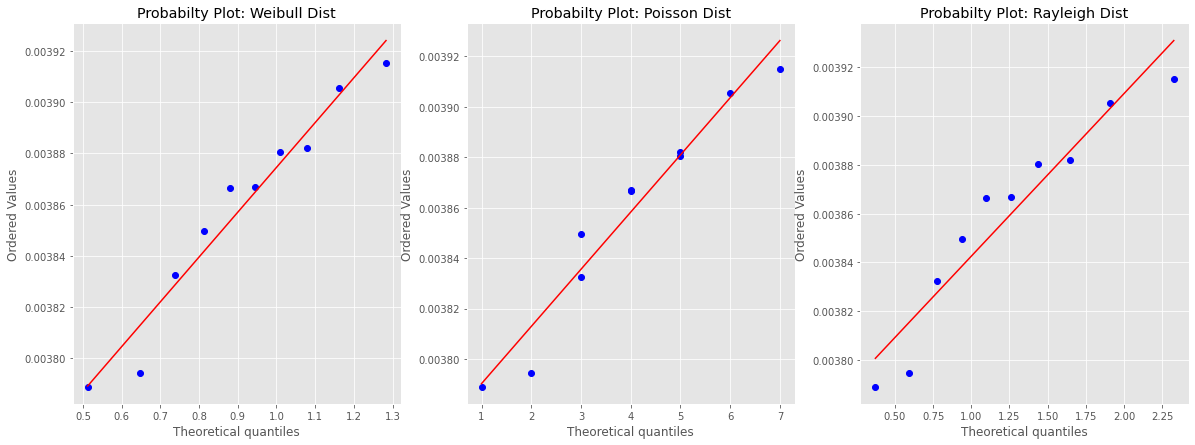

weibull slope : 0.00017484297633585256
weibull intercept : 0.0036996769161074805
weibull r : 0.9771144779428287

poisson slope : 2.2683822079252277e-05
poisson intercept : 0.003767507468813877
poisson r : 0.974313673800222

rayleigh slope : 6.677844577476351e-05
rayleigh intercept : 0.003775767974048919
rayleigh r : 0.9547484569012838

optimal c (weibull): 3.9899999999999998
optimal mu (rayleigh): 3.92


In [5]:
# probability plot
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('ggplot')

# find optimal parameters
op_c = optimize_c(100, start =0.01, end = 4, plot = False)
op_mu = optimize_mu(100, start =0, end = 4, plot = False)

# plot all optimal params
plt.figure(figsize = (20,7))
plt.subplot(131)
res1 = stats.probplot(datalist, dist = stats.weibull_min(op_c), plot = plt)
plt.title('Probabilty Plot: Weibull Dist')
# plt.show()

plt.subplot(132)
res2 = stats.probplot(datalist, dist = stats.poisson(op_mu), plot = plt)
plt.title('Probabilty Plot: Poisson Dist')
# plt.show()
plt.subplot(133)
res3 = stats.probplot(datalist, dist = stats.rayleigh(), plot = plt)
plt.title('Probabilty Plot: Rayleigh Dist')
plt.show()

# print the summary statistics nicely
labels = 'slope', 'intercept', 'r'
titles = 'weibull', 'poisson', 'rayleigh'
res_list = [res1, res2, res3]
for t in range(len(titles)):
    for l in range(len(labels)):
        print(titles[t], labels[l], ':', res_list[t][-1][l])
    print()
print('optimal c (weibull):' , op_c)
print('optimal mu (rayleigh):', op_mu)